In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf

In [3]:
# importing libraries

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np

In [4]:
import os
print(os.listdir("../input/stanford-car-dataset-by-classes-folder"))


['names.csv', 'car_data', 'anno_test.csv', 'anno_train.csv']


In [5]:
dataset = '../input/stanford-car-dataset-by-classes-folder'

In [6]:
img_width, img_height = 224, 224
nb_train_samples = 8144
nb_test_samples = 8041
epochs = 30
batch_size = 64
n_classes = 196

In [7]:
train_data_dir = dataset + '/car_data/car_data/train'
test_data_dir = dataset + '/car_data/car_data/test'

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    #shear_range=0.2,
    zoom_range=0.2,
    #fill_mode = 'constant',
    #cval = 1,
    rotation_range = 5,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_set = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [8]:
IMAGE_SIZE = [224, 224]

In [9]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [10]:
flatten = Flatten()(resnet.output)
dense = Dense(512, activation = 'relu')(flatten)
dense = Dense(512, activation = 'relu')(flatten)
dense = Dense(256, activation = 'relu')(dense)
prediction = Dense(n_classes, activation = 'softmax')(dense)

In [11]:
#creating a model
model = Model(inputs = resnet.input, outputs = prediction )

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [13]:
# COMPILING THE MODEL

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
#executing the model
history = model.fit_generator(train_set, validation_data = (test_set), epochs = epochs, verbose = 1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
128/128 [==============================] - 335s 3s/step - loss: 6.9878 - accuracy: 0.0051 - val_loss: 5.2773 - val_accuracy: 0.0085
Epoch 2/30
128/128 [==============================] - 243s 2s/step - loss: 5.2619 - accuracy: 0.0105 - val_loss: 5.2766 - val_accuracy: 0.0053
Epoch 3/30
128/128 [==============================] - 242s 2s/step - loss: 5.2086 - accuracy: 0.0132 - val_loss: 5.2765 - val_accuracy: 0.0085
Epoch 4/30
128/128 [==============================] - 247s 2s/step - loss: 5.0949 - accuracy: 0.0204 - val_loss: 5.2784 - val_accuracy: 0.0053
Epoch 5/30
128/128 [==============================] - 247s 2s/step - loss: 4.9039 - accuracy: 0.0268 - val_loss: 5.2784 - val_accuracy: 0.0055
Epoch 6/30
128/128 [==============================] - 245s 2s/step - loss: 4.6620 - accuracy: 0.0414 - val_loss: 5.1039 - val_accuracy: 0.0139
Epoch 7/30
128/128 [==============================] - 247s 2s/step - loss: 4.4573 - accuracy: 0.0564 - val_loss: 5.2774 - val_accuracy: 0.0085

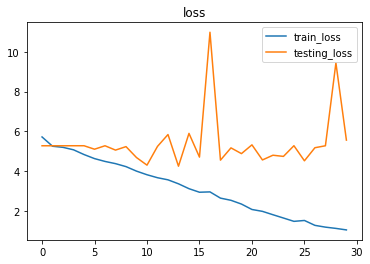

In [16]:
# plotting the loss

import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'testing_loss')
plt.title('loss')
plt.legend()
plt.show()

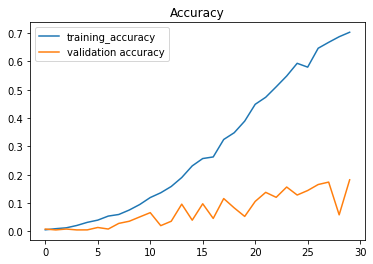

In [17]:
# Both Validation and Training accuracy is shown here

plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [18]:
result = model.evaluate(test_set)
print("test_loss, test accuracy",result)

126/126 [==============================] - 78s 615ms/step - loss: 5.5609 - accuracy: 0.1822
test_loss, test accuracy [5.560933589935303, 0.18219126760959625]
